In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle as pkl
import scanpy as sc

sc.settings.set_figure_params(dpi=100)

## Convert INCOV symptom table to JAMA naming scheme

In [2]:
# read in INCOV symptoms
# > rows are patient IDs, columns are symptoms
data = pd.read_csv('../../data/INCOV.PA.symptoms.CELL2023.csv', index_col=0)
# read the mapping
# > INCOV symptom names to JAMA symptom names
with open('outputs/INCOV_to_JAMA.dict.pkl', 'rb') as f:
    INCOV_to_JAMA = pkl.load(f)

In [3]:
# convert INCOV symptoms to JAMA symptom names
data_jama = data.T.copy()
data_jama['JAMA_symptom'] = data_jama.index.map(INCOV_to_JAMA)
data_jama = data_jama.groupby('JAMA_symptom').max().T

## Score the JAMA naming scheme formatted table

In [4]:
# list out the JAMA scorng
JAMA_to_score = {'Smell/taste': 8,
                 'P-E Malaise': 7,
                 'Chronic cough': 4,
                 'Brain fog': 3,
                 'Thirst': 3,
                 'Palpitations': 2,
                 'Chest pain': 2,
                 'Fatigue': 1,
                 'Sexual desire or capacity': 1,
                 'Dizziness': 1,
                 'GI': 1,
                 'Abnormal movements': 1,
                 'Hair loss': 0}

In [5]:
# identify the intersecting symptoms
# print the percent of overlap as well as the n-target/total
valid_JAMA = [x for x in JAMA_to_score if x in data_jama.columns]
print('VALID')
print('n-overlap', len(valid_JAMA), 'n-total', len(JAMA_to_score))
print('%-overlap', round(len(valid_JAMA) / len(JAMA_to_score) * 100, 2))
print()
# print the invalid (not found) symptom groups
invalid_jama = [x for x in JAMA_to_score if x not in data_jama.columns]
print('INVALID')
print(invalid_jama)

VALID
n-overlap 10 n-total 13
%-overlap 76.92

INVALID
['Thirst', 'Sexual desire or capacity', 'Abnormal movements']


In [6]:
# we compute the scores for INCOV patients
valid_JAMA_scores = pd.Series([JAMA_to_score[x] for x in valid_JAMA])
INCOV_scores = np.dot(data_jama[valid_JAMA].fillna(0), valid_JAMA_scores)
INCOV_scores = pd.Series(INCOV_scores, index=data_jama.index)
# write the JAMA score for INCOV patients
INCOV_scores.to_csv('outputs/INCOV.JAMA_scores.csv')

[Text(0.5, 0, 'JAMA PASC Score'), Text(0, 0.5, 'n-patients with X score')]

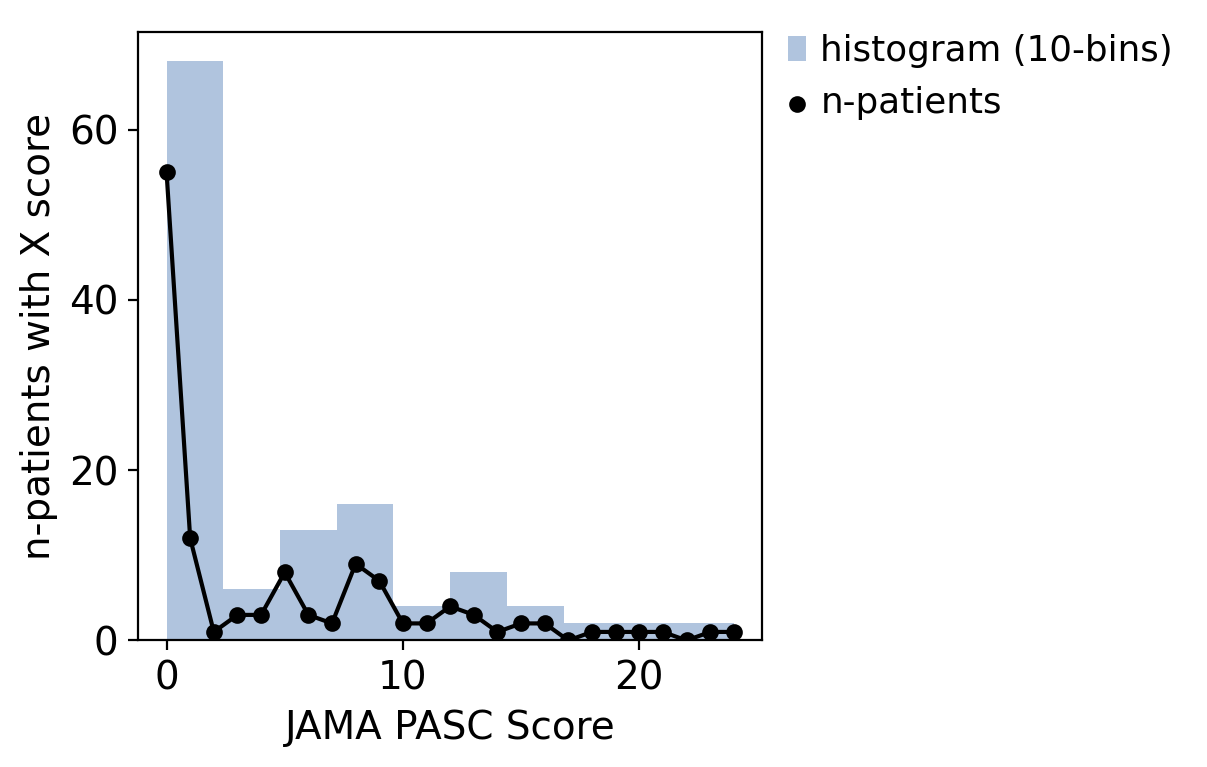

In [7]:
# create data for the plot
vmax = int((max(INCOV_scores)) + 1)
plot = INCOV_scores.value_counts().reindex(range(vmax)).fillna(0)
# plot a histogram for the scores
fig, ax = plt.subplots(figsize=[4, 4])
ax.grid(False)
ax.hist(INCOV_scores, bins=10, color='lightsteelblue', label='histogram (10-bins)')
ax.scatter(plot.index, plot, color='k', s=25, label='n-patients')
ax.plot(plot.index, plot, color='k')
ax.legend(bbox_to_anchor=(0.99, 1.05), bbox_transform=ax.transAxes,
          loc='upper left', frameon=False)
ax.set(xlabel='JAMA PASC Score', ylabel='n-patients with X score')

## Convert HAARVI symptom table to JAMA naming scheme

In [8]:
# read in HAARVI symptoms
# > rows are patient IDs, columns are symptoms
data = pd.read_csv('../../data/HAARVI.PA.symptoms.CELL2023.csv', index_col=0)
# clean up the data
data = data.dropna(how='all')
data.columns = data.columns.str.replace('FU_', '')
# read the mapping
# > HAARVI symptom names to JAMA symptom names
with open('outputs/HAARVI_to_JAMA.dict.pkl', 'rb') as f:
    HAARVI_to_JAMA = pkl.load(f)

In [9]:
# convert HAARVI symptoms to JAMA symptom names
data_jama = data.T.copy()
data_jama['JAMA_symptom'] = data_jama.index.map(HAARVI_to_JAMA)
data_jama = data_jama.groupby('JAMA_symptom').max().T

In [10]:
# read the mapping for the written notes
# > HAARVI symptom names to JAMA symptom names
with open('outputs/HAARVI_ID_to_JAMA.dict.pkl', 'rb') as f:
    HAARVI_ID_to_JAMA = pkl.load(f)
# add in the other symptoms
for patient_id, symptoms in HAARVI_ID_to_JAMA.items():
    for symptom in symptoms:
        # add symptom if not identified previously
        if symptom not in data_jama:
            data_jama[symptom] = 0
        # add in the symptom x patient id intersection
        data_jama.loc[patient_id, symptom] += 1

## Score the JAMA naming scheme formatted table

In [11]:
# list out the JAMA scorng
JAMA_to_score = {'Smell/taste': 8,
                 'P-E Malaise': 7,
                 'Chronic cough': 4,
                 'Brain fog': 3,
                 'Thirst': 3,
                 'Palpitations': 2,
                 'Chest pain': 2,
                 'Fatigue': 1,
                 'Sexual desire or capacity': 1,
                 'Dizziness': 1,
                 'GI': 1,
                 'Abnormal movements': 1,
                 'Hair loss': 0}

In [12]:
# identify the intersecting symptoms
# print the percent of overlap as well as the n-target/total
valid_JAMA = [x for x in JAMA_to_score if x in data_jama.columns]
print('VALID')
print('n-overlap', len(valid_JAMA), 'n-total', len(JAMA_to_score))
print('%-overlap', round(len(valid_JAMA) / len(JAMA_to_score) * 100, 2))
print()
# print the invalid (not found) symptom groups
invalid_jama = [x for x in JAMA_to_score if x not in data_jama.columns]
print('INVALID')
print(invalid_jama)

VALID
n-overlap 9 n-total 13
%-overlap 69.23

INVALID
['Thirst', 'Palpitations', 'Sexual desire or capacity', 'Abnormal movements']


In [13]:
# we compute the scores for HAARVI patients
valid_JAMA_scores = pd.Series([JAMA_to_score[x] for x in valid_JAMA])
HAARVI_scores = np.dot(data_jama[valid_JAMA].fillna(0), valid_JAMA_scores)
HAARVI_scores = pd.Series(HAARVI_scores, index=data_jama.index)
# write the JAMA score for HAARVI patients
HAARVI_scores.to_csv('outputs/HAARVI.JAMA_scores.csv')

[Text(0.5, 0, 'JAMA PASC Score'), Text(0, 0.5, 'n-patients with X score')]

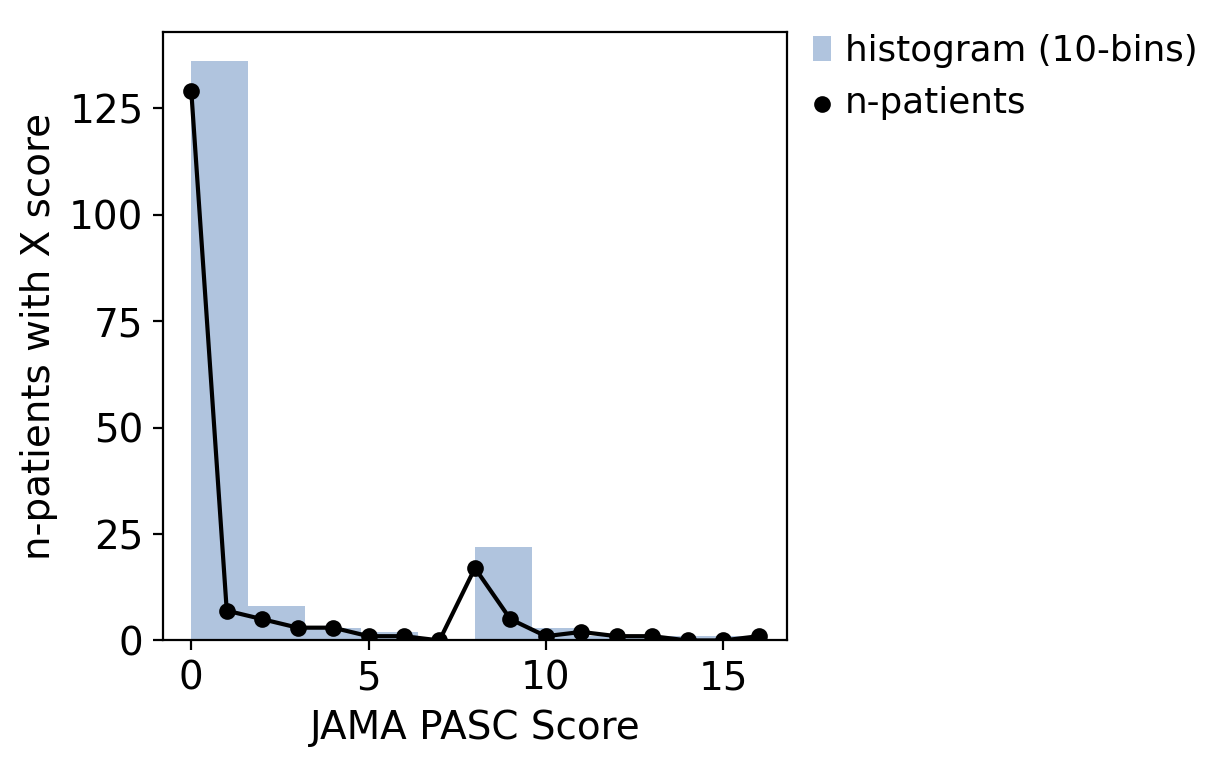

In [14]:
# create data for the plot
vmax = int((max(HAARVI_scores)) + 1)
plot = HAARVI_scores.value_counts().reindex(range(vmax)).fillna(0)
# plot a histogram for the scores
fig, ax = plt.subplots(figsize=[4, 4])
ax.grid(False)
ax.hist(HAARVI_scores, bins=10, color='lightsteelblue', label='histogram (10-bins)')
ax.scatter(plot.index, plot, color='k', s=25, label='n-patients')
ax.plot(plot.index, plot, color='k')
ax.legend(bbox_to_anchor=(0.99, 1.05), bbox_transform=ax.transAxes,
          loc='upper left', frameon=False)
ax.set(xlabel='JAMA PASC Score', ylabel='n-patients with X score')